<a href="https://colab.research.google.com/github/zahramoradi1998m/liquidity-risk-prediction-deep-learning/blob/main/mlp_claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers import LSTM,Dropout,Flatten,BatchNormalization,SimpleRNN ,Conv1D,MaxPooling1D,GlobalAveragePooling1D,GlobalMaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import torch
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras import backend as K
from tensorflow import keras
from tensorflow.python.framework import ops
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from nbconvert.preprocessors import ExecutePreprocessor
import nbformat
from keras.utils import plot_model




In [ ]:
# run preprocess_claims_data.ipynb

# Define paths
notebook_path = '/content/drive/MyDrive/Colab Notebooks/mar/liquidity-risk-prediction-deep-learning/preprocessing/preprocess_Claims_data.ipynb'
output_path = notebook_path  # Save to the same path

# Load the notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    notebook = nbformat.read(f, as_version=4)

# Create an instance of ExecutePreprocessor
executor = ExecutePreprocessor(timeout=-1, kernel_name='python3')

# Execute the notebook
executor.preprocess(notebook, {'metadata': {'path': '/content/drive/MyDrive/Colab Notebooks/mar/liquidity-risk-prediction-deep-learning/preprocessing/'}})

# Save the executed notebook
with open(output_path, 'w', encoding='utf-8') as f:
    nbformat.write(notebook, f)


In [ ]:
# load data from preprocess_claims_data.ipynb
file_path = '/content/drive/MyDrive/Colab Notebooks/mar/liquidity-risk-prediction-deep-learning/dataset/Preprocessed Claims Data.pkl'
with open(file_path, 'rb') as f:
    (testX_Claims, testY_Claims, trainX_Claims, trainY_Claims,
     validX_Claims, validY_Claims, trainX1_Claims, validX1_Claims) = pickle.load(f)

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

tune hyperparameter via Bayesian algorithm

In [ ]:
def create_model1(n1,n2,active1,active2):
  model=Sequential()
  model.add(Input(shape=(trainX.shape[1],)))
  model.add(Dense(n1, kernel_initializer= 'normal' , activation=active1))
  model.add(Dense(n2, kernel_initializer= 'normal' , activation=active2))
  model.add(Dense(1, kernel_initializer= 'normal' ))
  return model

dimensions = [#Real(low=0.199, high=0.2, name='dropout')]
              Integer(low=3, high=40, name='n1'),
              Integer(low=3, high=40, name='n2'),
              Categorical(['relu', 'sigmoid', 'linear'], name='active1'),
              Categorical(['relu', 'sigmoid', 'linear'], name='active2')
              ]

@use_named_args(dimensions=dimensions)
def fitness(n1,n2,active1,active2):
  model=create_model1(n1,n2,active1,active2)
  model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
  filepath="weights.best.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=0, mode= 'max' )
  callbacks_list = [checkpoint]
  model.fit(trainX, trainY, validation_data=(validX,validY), epochs=100, batch_size=10, callbacks=callbacks_list, verbose=2)
  trainPredicted=model.predict(trainX)
  trainMSE = mean_squared_error(trainY, trainPredicted)

  del model
  K.clear_session()
  ops.reset_default_graph()
  return trainMSE

gp_result = gp_minimize(func=fitness,
                            dimensions=dimensions)

gp_resultdef create_model1(n1,n2,active1,active2):
  model=Sequential()
  model.add(Input(shape=(trainX.shape[1],)))
  model.add(Dense(n1, kernel_initializer= 'normal' , activation=active1))
  model.add(Dense(n2, kernel_initializer= 'normal' , activation=active2))
  model.add(Dense(1, kernel_initializer= 'normal' ))
  return model

dimensions = [#Real(low=0.199, high=0.2, name='dropout')]
              Integer(low=3, high=40, name='n1'),
              Integer(low=3, high=40, name='n2'),
              Categorical(['relu', 'sigmoid', 'linear'], name='active1'),
              Categorical(['relu', 'sigmoid', 'linear'], name='active2')
              ]

@use_named_args(dimensions=dimensions)
def fitness(n1,n2,active1,active2):
  model=create_model1(n1,n2,active1,active2)
  model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
  filepath="weights.best.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=0, mode= 'max' )
  callbacks_list = [checkpoint]
  model.fit(trainX, trainY, validation_data=(validX,validY), epochs=100, batch_size=10, callbacks=callbacks_list, verbose=2)
  trainPredicted=model.predict(trainX)
  trainMSE = mean_squared_error(trainY, trainPredicted)

  del model
  K.clear_session()
  ops.reset_default_graph()
  return trainMSE

gp_result = gp_minimize(func=fitness,
                            dimensions=dimensions)

gp_result

In [ ]:

import numpy as np
import tensorflow as tf
import random

# Set seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

MLP_Claims_model=Sequential()
MLP_Claims_model.add(Input(shape=(trainX_Claims.shape[1],)))
MLP_Claims_model.add(Dense(35, kernel_initializer= 'normal' , activation='tanh'))
MLP_Claims_model.add(Dense(12, kernel_initializer= 'normal' , activation='relu'))
MLP_Claims_model.add(Dense(1, kernel_initializer= 'normal' ))


MLP_Claims_model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy', verbose=0, mode= 'max' )
callbacks_list = [checkpoint]
MLP_Claims_model.fit(trainX_Claims, trainY_Claims, validation_data=(validX_Claims,validY_Claims), epochs=100, batch_size=10, callbacks=callbacks_list, verbose=2)


Epoch 1/100
29/29 - 1s - loss: 0.0152 - val_loss: 0.0197 - 1s/epoch - 35ms/step
Epoch 2/100
29/29 - 0s - loss: 0.0137 - val_loss: 0.0198 - 128ms/epoch - 4ms/step
Epoch 3/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 - 0s - loss: 0.0137 - val_loss: 0.0197 - 109ms/epoch - 4ms/step
Epoch 4/100
29/29 - 0s - loss: 0.0136 - val_loss: 0.0197 - 102ms/epoch - 4ms/step
Epoch 5/100
29/29 - 0s - loss: 0.0135 - val_loss: 0.0198 - 142ms/epoch - 5ms/step
Epoch 6/100
29/29 - 0s - loss: 0.0134 - val_loss: 0.0196 - 166ms/epoch - 6ms/step
Epoch 7/100
29/29 - 0s - loss: 0.0131 - val_loss: 0.0198 - 182ms/epoch - 6ms/step
Epoch 8/100
29/29 - 0s - loss: 0.0130 - val_loss: 0.0201 - 152ms/epoch - 5ms/step
Epoch 9/100
29/29 - 0s - loss: 0.0128 - val_loss: 0.0198 - 145ms/epoch - 5ms/step
Epoch 10/100
29/29 - 0s - loss: 0.0126 - val_loss: 0.0204 - 170ms/epoch - 6ms/step
Epoch 11/100
29/29 - 0s - loss: 0.0126 - val_loss: 0.0202 - 173ms/epoch - 6ms/step
Epoch 12/100
29/29 - 0s - loss: 0.0126 - val_loss: 0.0207 - 170ms/epoch - 6ms/step
Epoch 13/100
29/29 - 0s - loss: 0.0125 - val_loss: 0.0207 - 169ms/epoch - 6ms/step
Epoch 14/100
29/29 - 0s - loss: 0.0123 - val_loss: 0.0207 - 190ms/epoch - 7ms/step
Epoch 15/100
29/29 - 0s

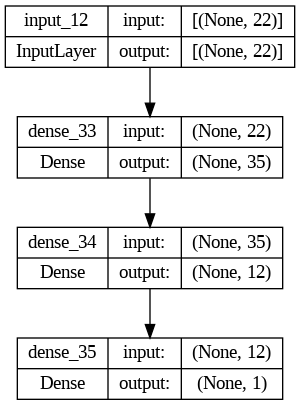

In [ ]:
plot_model(MLP_Claims_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Training set predictions and evaluations
MLP_Claims_trainPredicted = MLP_Claims_model.predict(trainX_Claims)
MLP_Claims_trainMSE = mean_squared_error(trainY_Claims, MLP_Claims_trainPredicted)
MLP_Claims_trainMAE = mean_absolute_error(trainY_Claims, MLP_Claims_trainPredicted)
MLP_Claims_trainR2 = r2_score(trainY_Claims, MLP_Claims_trainPredicted)

print('Train Score: %.4f MSE (%.4f RMSE)' % (MLP_Claims_trainMSE, math.sqrt(MLP_Claims_trainMSE)))
print('Train Score: %.4f MAE' % (MLP_Claims_trainMAE))
print('Train Score: %.4f R²' % (MLP_Claims_trainR2))

# Test set predictions and evaluations
MLP_Claims_testPredicted = MLP_Claims_model.predict(testX_Claims)
MLP_Claims_testMSE = mean_squared_error(testY_Claims, MLP_Claims_testPredicted)
MLP_Claims_testMAE = mean_absolute_error(testY_Claims, MLP_Claims_testPredicted)
MLP_Claims_testR2 = r2_score(testY_Claims, MLP_Claims_testPredicted)

print('Test Score: %.4f MSE (%.4f RMSE)' % (MLP_Claims_testMSE, math.sqrt(MLP_Claims_testMSE)))
print('Test Score: %.4f MAE' % (MLP_Claims_testMAE))
print('Test Score: %.4f R²' % (MLP_Claims_testR2))

9/9 [==============================] - 0s 3ms/step
Train Score: 0.0050 MSE (0.0706 RMSE)
Train Score: 0.0362 MAE
Train Score: 0.6422 R²
3/3 [==============================] - 0s 6ms/step
Test Score: 0.0062 MSE (0.0788 RMSE)
Test Score: 0.0495 MAE
Test Score: 0.0300 R²
